# Mobile Price Classification

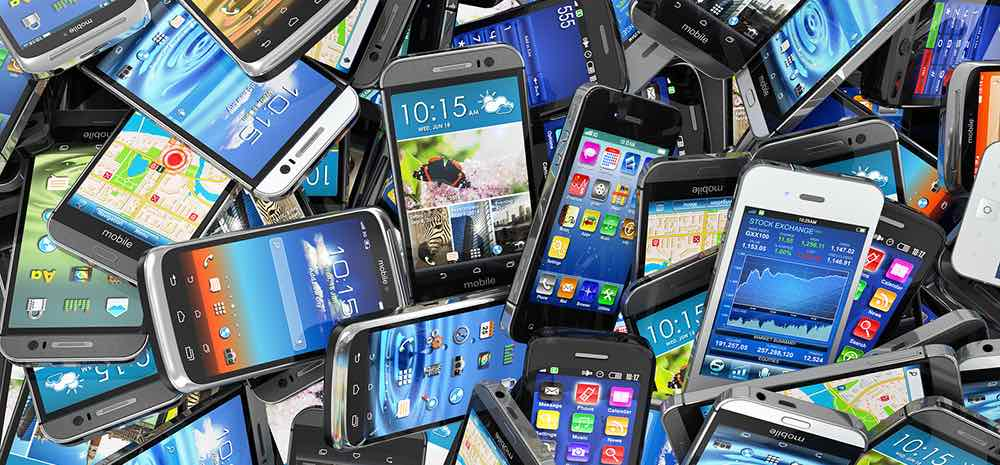

Dataset from kaggle website: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/code

classify mobile price range
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is..

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
%matplotlib inline


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(2000, 21)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [6]:
check(df)

,column,dtypes,nunique,sum_null
0,battery_power,int64,1094,0
1,blue,int64,2,0
2,clock_speed,float64,26,0
3,dual_sim,int64,2,0
4,fc,int64,20,0
5,four_g,int64,2,0
6,int_memory,int64,63,0
7,m_dep,float64,10,0
8,mobile_wt,int64,121,0
9,n_cores,int64,8,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
        cat_features.append(column_name)
    else:
        num_features.append(column_name)

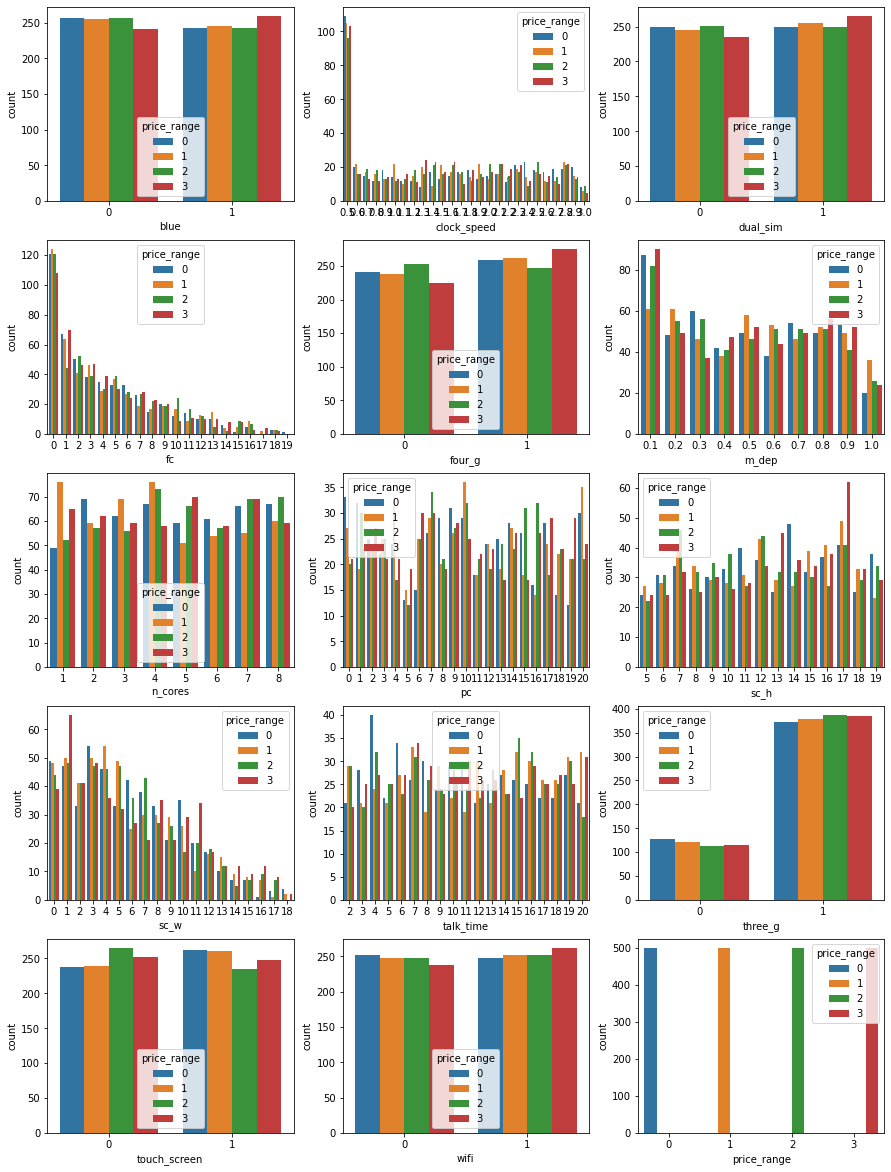

In [9]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df,hue='price_range')
    i +=1
    

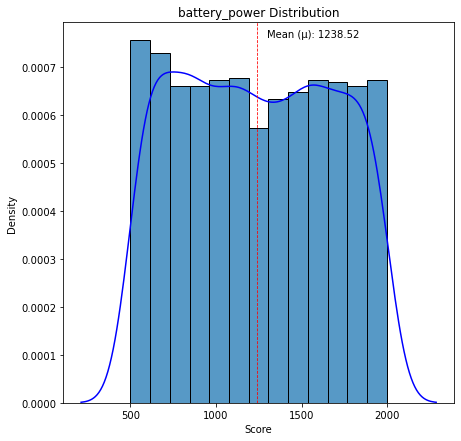

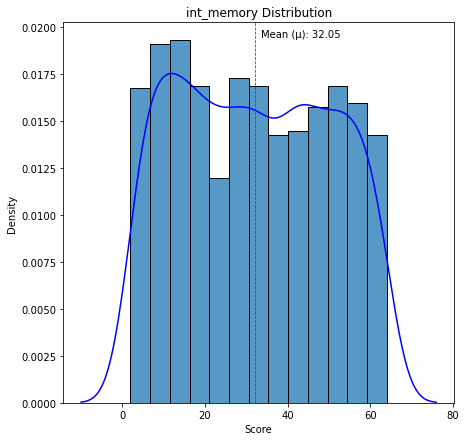

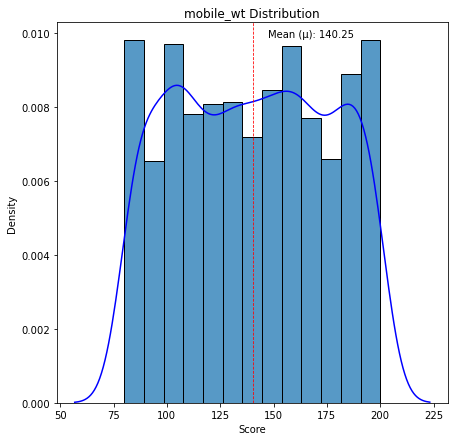

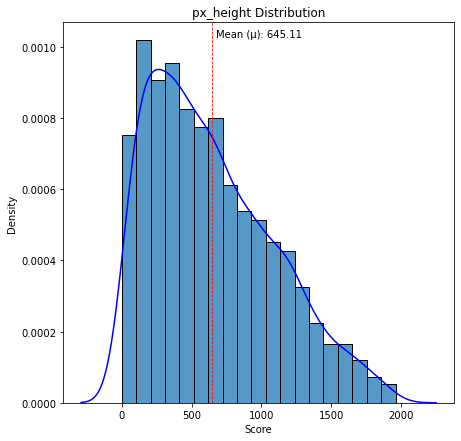

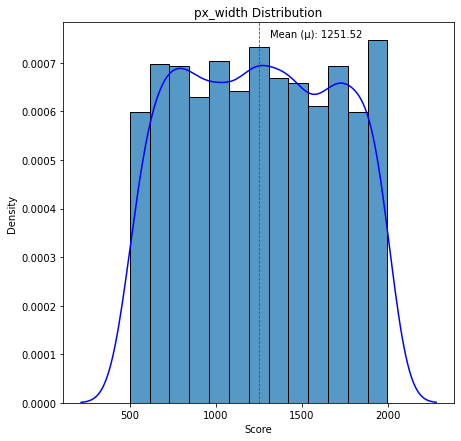

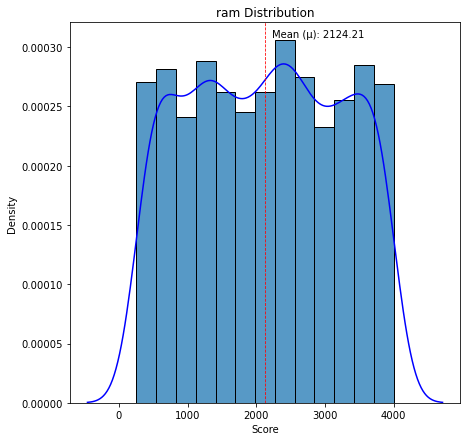

In [10]:
for column_name in num_features:
    plt.figure(figsize=(7, 7))
    plt.title("{column_name} Distribution".format(column_name = column_name))
    sns.histplot(df[column_name], stat='density')
    sns.kdeplot(df[column_name], color='blue')
    plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')
y = df['price_range']
X = df.drop('price_range', axis = 1)

In [12]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
lr = LogisticRegression(random_state=42)

In [15]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [16]:
predictions = lr.predict(X_test)

In [17]:
accuracy = metrics.accuracy_score(y_test, predictions)

In [18]:
accuracy

0.626

In [19]:
len(df[df['price_range'] == 1])

500

In [20]:
len(df[df['price_range'] == 0])

500

In [21]:
len(df[df['price_range'] == 2])

500

In [22]:
len(df[df['price_range'] == 3])

500

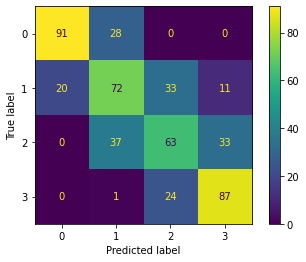

In [23]:
metrics.plot_confusion_matrix(lr,X_test,y_test)

In [24]:
rc = RandomForestClassifier(random_state=42)

In [25]:
rc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
predictions2 = rc.predict(X_test)

In [27]:
accuracy = metrics.accuracy_score(y_test, predictions2)

In [28]:
accuracy

0.864

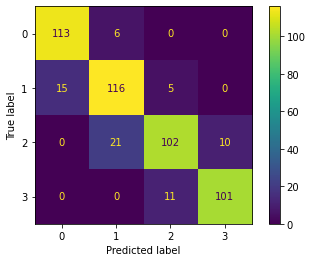

In [29]:
metrics.plot_confusion_matrix(rc, X_test,y_test)

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC()

In [32]:
svc.fit(X_train,y_train)

SVC()

In [33]:
prediction_svc = svc.predict(X_test)

In [34]:
accuray_cv = metrics.accuracy_score(y_test, prediction_svc)

In [35]:
accuray_cv

0.948

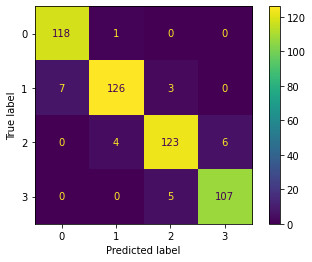

In [36]:
metrics.plot_confusion_matrix(svc,X_test,y_test)

In [37]:
def preprocess(name):
    df = pd.read_csv(name)
    y = df['price_range']
    X = df.drop('price_range', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
    return X_train, X_test, y_train, y_test

In [38]:
X_train, X_test, y_train, y_test = preprocess('train.csv')

In [39]:
def modelling(x1,x2,y1,y2):
    
    lr = LogisticRegression()
    rc = RandomForestClassifier()
    svc = SVC()
    
    lr.fit(X_train,y_train)
    rc.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    
    lr_predictions = lr.predict(X_test)
    rc_predictions = rc.predict(X_test)
    svc_predictions = svc.predict(X_test)
    
    accuracy_lr = metrics.accuracy_score(y_test, lr_predictions)
    accuracy_rc = metrics.accuracy_score(y_test, rc_predictions)
    accuracy_svc = metrics.accuracy_score(y_test, svc_predictions)
    
    accuracy_list = [accuracy_lr,accuracy_rc,accuracy_svc]

    
    final = max(accuracy_list)
    
    return final
    

In [40]:
final = modelling(X_train,X_test,y_train,y_test)

In [41]:
final

0.952